In [22]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from datetime import datetime
from datetime import timedelta
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [23]:
def get_dataset(url, country, state, recent_days_count):
    raw_dataset = pd.read_csv(url)
    df = raw_dataset[(raw_dataset['Country/Region']==country) & (raw_dataset['Province/State']==state)]
    df = df.drop(columns=['Lat', 'Long'])
    df = df.melt(['Province/State', 'Country/Region'], var_name='Date', value_name='Cases')
    df.insert(4, 'Day', range(1, 1 + len(df)))
    for i in range(0, len(df)):
        df.loc[i, 'New_Cases'] = 0 if i == 0 else df.loc[i, 'Cases'] - df.loc[i-1, 'Cases']
        df.loc[i, 'Spread_Rate'] = None if i == 0 else df.loc[i, 'Cases'] / df.loc[i-1, 'Cases']
        df.loc[i, 'New_Cases_Diff'] = 0 if i == 0 else df.loc[i, 'New_Cases'] - df.loc[i-1, 'New_Cases']
        df.loc[i, 'Spread_Rate_Diff'] = (0 if i == 0 else df.loc[i, 'Spread_Rate'] - df.loc[i-1, 'Spread_Rate']) * 100
    return df.tail(recent_days_count)

In [24]:
def find_peak_cnt_day(predictions):
    peak_day = None
    for i in range(0, len(predictions)):
        if predictions[i] < 0:
            peak_day = i
            break
    return peak_day

def find_various_peak_day_degree(ds, degree_end):
    next_day = ds.Day[-1:].values[0] + 1
    for i in range(1, degree_end+1):
        predictions = get_predictions(ds, i, next_day, 150)
        peak_day = find_peak_cnt_day(predictions)
        if peak_day: print("\tPeak Day for degree="+str(i)+" is "+str(peak_day))

def find_various_peak_day_train_cnt(url, country, train_start, train_end, degree_threshold):
    for i in range(train_start, train_end):
        print("Training Cnt: "+str(i))
        ds = get_dataset(url, country, i)
        find_various_peak_day_degree(ds, degree_threshold)
        if(i > train_end):
            print("Traind End Cnt Reached!!")
            break

In [25]:
url="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [26]:
## Prediction Model for Canada - Ontario
country="Canada"
state="Ontario"
ds = get_dataset(url, country, state, 15)
ds

,Province/State,Country/Region,Date,Cases,Day,New_Cases,Spread_Rate,New_Cases_Diff,Spread_Rate_Diff
95,Ontario,Canada,4/26/20,15568,96,556.0,1.037037,94.0,0.528446
96,Ontario,Canada,4/27/20,15970,97,402.0,1.025822,-154.0,-1.121484
97,Ontario,Canada,4/28/20,16500,98,530.0,1.033187,128.0,0.736503
98,Ontario,Canada,4/29/20,16978,99,478.0,1.028970,-52.0,-0.421753
99,Ontario,Canada,4/30/20,17395,100,417.0,1.024561,-61.0,-0.440850
100,Ontario,Canada,5/1/20,17880,101,485.0,1.027882,68.0,0.332038
101,Ontario,Canada,5/2/20,18321,102,441.0,1.024664,-44.0,-0.321715
102,Ontario,Canada,5/3/20,18574,103,253.0,1.013809,-188.0,-1.085514
103,Ontario,Canada,5/4/20,19097,104,523.0,1.028158,270.0,1.434835
104,Ontario,Canada,5/5/20,19468,105,371.0,1.019427,-152.0,-0.873050


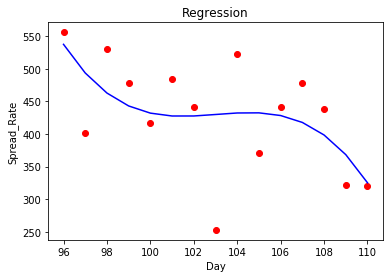

In [27]:
X = ds['Day'].values.reshape(-1,1)
y = ds['New_Cases'].values.reshape(-1,1)
poly_reg= PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

plt.scatter(X, y, color='red')
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.title('Regression')
plt.xlabel('Day')
plt.ylabel('Spread_Rate')
plt.show()

In [28]:
x_new = np.reshape(range(102,150), (-1, 1))
y_new = pol_reg.predict(poly_reg.fit_transform(x_new))

In [29]:
for i in range(0, 20):
    print(x_new[i],y_new[i])

[102] [427.65132497]
[103] [429.91764686]
[104] [432.2427923]
[105] [432.44501165]
[106] [428.3425553]
[107] [417.7536736]
[108] [398.49661691]
[109] [368.38963562]
[110] [325.25098008]
[111] [266.89890067]
[112] [191.15164774]
[113] [95.82747168]
[114] [-21.25537716]
[115] [-162.27864841]
[116] [-329.4240917]
[117] [-524.87345666]
[118] [-750.80849293]
[119] [-1009.41095013]
[120] [-1302.8625779]
[121] [-1633.34512588]


In [30]:
ds

,Province/State,Country/Region,Date,Cases,Day,New_Cases,Spread_Rate,New_Cases_Diff,Spread_Rate_Diff
95,Ontario,Canada,4/26/20,15568,96,556.0,1.037037,94.0,0.528446
96,Ontario,Canada,4/27/20,15970,97,402.0,1.025822,-154.0,-1.121484
97,Ontario,Canada,4/28/20,16500,98,530.0,1.033187,128.0,0.736503
98,Ontario,Canada,4/29/20,16978,99,478.0,1.028970,-52.0,-0.421753
99,Ontario,Canada,4/30/20,17395,100,417.0,1.024561,-61.0,-0.440850
100,Ontario,Canada,5/1/20,17880,101,485.0,1.027882,68.0,0.332038
101,Ontario,Canada,5/2/20,18321,102,441.0,1.024664,-44.0,-0.321715
102,Ontario,Canada,5/3/20,18574,103,253.0,1.013809,-188.0,-1.085514
103,Ontario,Canada,5/4/20,19097,104,523.0,1.028158,270.0,1.434835
104,Ontario,Canada,5/5/20,19468,105,371.0,1.019427,-152.0,-0.873050


In [31]:
ds1 = ds[['Province/State', 'Country/Region', 'Date', 'Day', 'Cases','New_Cases']].tail(1)
for i in range(0, len(x_new)):
    day = x_new[i][0]
    prev_cases = ds1.Cases[-1:].values[0]
    new_cases = 0 if prev_cases == 0 else y_new[i][0]
    cases = prev_cases + new_cases
    cases = 0 if cases < 0 else cases 
    date = datetime.strftime(datetime.strptime(ds1.Date[-1:].values[0] , '%m/%d/%y') + timedelta(days=1), '%m/%d/%y')
    ds1 = ds1.append({
        'Province/State': state, 'Country/Region': country, 'Date' : date, 'Day': day, 'Cases': cases, 'New_Cases': new_cases
    } , ignore_index=True)

In [32]:
ds1

,Province/State,Country/Region,Date,Day,Cases,New_Cases
0,Ontario,Canada,5/10/20,110,21469.000000,321.000000
1,Ontario,Canada,05/11/20,102,21896.651325,427.651325
2,Ontario,Canada,05/12/20,103,22326.568972,429.917647
3,Ontario,Canada,05/13/20,104,22758.811764,432.242792
4,Ontario,Canada,05/14/20,105,23191.256776,432.445012
5,Ontario,Canada,05/15/20,106,23619.599331,428.342555
6,Ontario,Canada,05/16/20,107,24037.353005,417.753674
7,Ontario,Canada,05/17/20,108,24435.849622,398.496617
8,Ontario,Canada,05/18/20,109,24804.239257,368.389636
9,Ontario,Canada,05/19/20,110,25129.490237,325.250980


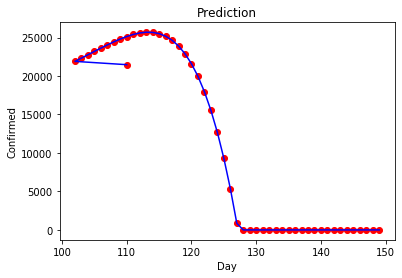

In [33]:
x=ds1.Day.values
y=ds1.Cases.values
plt.scatter(x, y, color='red')
plt.plot(x, y, color='blue')
plt.title('Prediction')
plt.xlabel('Day')
plt.ylabel('Confirmed')
plt.show()

In [34]:
peak_day = find_peak_cnt_day(y_new) + 1

In [35]:
peak_date = ds1.loc[peak_day, 'Date']
print('Peak Count is expected on '+peak_date)

Peak Count is expected on 05/23/20
